<center><h1>QBUS2810 - Statistical Modelling for Business - 2023S2</h1></center>
<center><h2> Individual Assignment (20%)</h2></center>

### SID: 510631839

<br/>

<span style='color:red'>**Important:** You must submit this Notebook in ***html*** and ***ipynb*** (raw) formats via Turnitin on Canvas.</span>  The *html* files are marked directly on Turnitin (for plagiarism and ChatGPT checking) and the raw Notebook (ipynb) files are used to validate your Python code in the *html* file.     

**Step 1:** Rename the Notebook by replacing `123456` at the end of file name with your SID. <br/>
**Step 2:** Provide your SID again by replacing `(provide your SID here)` with your SID.




## Task 1 (15 marks)
Conduct an appropriate exploratory data analysis on the house price, for all houses, including:

#### (a) Discuss any data cleaning you performed, including reasons for your decisions and the methods used, or reasons for not performing cleaning.

#### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 
from scipy.stats import ttest_ind 
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('house_price_data_train.csv')  
data.head()

,price,sqft,Bedrooms,Baths,Age,Occupancy,Pool,Fireplace,Waterfront,DOM
0,226000.0,3368,4,2,1,1,No,1,0,135
1,105800.0,2786,3,2,25,1,No,0,0,23
2,209100.0,3456,4,3,1,2,No,0,0,173
3,120000.0,2222,4,2,35,2,No,0,0,150
4,163500.0,2517,4,2,8,1,No,1,0,15


### My progress in cleaning data:
1. Delete missing values
2. Find duplicated values and decide whether to keep/delete them (if any)
3. Check for invalid values 

In [3]:
# 1. Eliminate empty rows (if any)
data = data.dropna()
data

,price,sqft,Bedrooms,Baths,Age,Occupancy,Pool,Fireplace,Waterfront,DOM
0,226000.0,3368,4,2,1,1,No,1,0,135
1,105800.0,2786,3,2,25,1,No,0,0,23
2,209100.0,3456,4,3,1,2,No,0,0,173
3,120000.0,2222,4,2,35,2,No,0,0,150
4,163500.0,2517,4,2,8,1,No,1,0,15
...,...,...,...,...,...,...,...,...,...,...
995,201700.0,2856,4,3,1,2,No,1,1,316
996,24000.0,838,2,1,45,2,No,0,0,8
997,130000.0,2051,3,2,25,1,No,0,0,31
998,172000.0,2603,3,2,8,1,No,1,0,126


In [4]:
df = pd.DataFrame(data)
duplicate_mask = df.duplicated()
duplicate_rows = df[duplicate_mask]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
        price  sqft  Bedrooms  Baths  Age  Occupancy Pool  Fireplace  \
435   95900.0  1088         2      1   18          3   No          0   
455  134600.0  2418         4      2    1          2   No          0   
614   95900.0  1088         2      1   18          3   No          0   
751  126600.0  2348         3      2    1          2   No          0   
772  155000.0  1196         2      2    1          2   No          0   
774   95900.0  1088         2      1   18          3   No          0   
791  133800.0  2418         4      2    1          2   No          0   
868   95900.0  1088         2      1   18          3   No          0   
947  133800.0  2418         4      2    1          2   No          0   
983  129800.0  2348         3      2    1          2   No          0   
989   77900.0  1108         2      1   18          2   No          0   

     Waterfront  DOM  
435           0    6  
455           0    0  
614           0   79  
751           0    0  
772 

In [5]:
# 3.Check for invalid values(if any)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       997 non-null    float64
 1   sqft        997 non-null    int64  
 2   Bedrooms    997 non-null    int64  
 3   Baths       997 non-null    int64  
 4   Age         997 non-null    int64  
 5   Occupancy   997 non-null    int64  
 6   Pool        997 non-null    object 
 7   Fireplace   997 non-null    int64  
 8   Waterfront  997 non-null    int64  
 9   DOM         997 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 85.7+ KB


### Comment

After 3 steps, it is found that:
1. Delete missing values: There are 3 missing values and they are deleted
2. Find duplicated values and decide whether to keep/delete them (if any): 
There are some exactly similar rows, however, they can be terraced houses which has the same style, price and sqft  so I decide to keep them 
3. Check for invalid values: There is no invalid values 

#### (b) Examine the data types of all variables and consider appropriate data treatments for their usage in a linear regression model.

#### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

As can be seen in step 3 above, all of the variables are interger or float type , only 'Pool' contains object type. To make it usable in linear regression model, I will transform the data in 'Pool' column into interger

In [6]:
# Transform data in 'Pool' column into binary
data['Pool'] = data['Pool'].replace({'No': 0, 'Yes': 1})
data.head()

,price,sqft,Bedrooms,Baths,Age,Occupancy,Pool,Fireplace,Waterfront,DOM
0,226000.0,3368,4,2,1,1,0,1,0,135
1,105800.0,2786,3,2,25,1,0,0,0,23
2,209100.0,3456,4,3,1,2,0,0,0,173
3,120000.0,2222,4,2,35,2,0,0,0,150
4,163500.0,2517,4,2,8,1,0,1,0,15


In [7]:
# Use 3 dummies to represent Occupancy ={1,2,3} 
data['Owner'] = np.where(data['Occupancy']==1,1,0)
data['Vacant'] = np.where(data['Occupancy']==2,1,0)
data['Tenant'] = np.where(data['Occupancy']==3,1,0)
data.head(12)

,price,sqft,Bedrooms,Baths,Age,Occupancy,Pool,Fireplace,Waterfront,DOM,Owner,Vacant,Tenant
0,226000.0,3368,4,2,1,1,0,1,0,135,1,0,0
1,105800.0,2786,3,2,25,1,0,0,0,23,1,0,0
2,209100.0,3456,4,3,1,2,0,0,0,173,0,1,0
3,120000.0,2222,4,2,35,2,0,0,0,150,0,1,0
4,163500.0,2517,4,2,8,1,0,1,0,15,1,0,0
5,258000.0,4020,4,3,13,1,0,1,0,114,1,0,0
6,119900.0,1152,2,1,45,2,0,0,0,17,0,1,0
7,121300.0,1977,3,2,1,2,0,0,0,133,0,1,0
8,120000.0,3329,3,2,35,1,0,0,0,9,1,0,0
9,123400.0,2446,3,2,45,1,0,0,0,70,1,0,0


In tutorial 5, we have learned that the log transformation leads to an approximately symmetric distribution with moderate tails. I will try comparing the histogram of distribution of price and Distribution of LogPrice below.

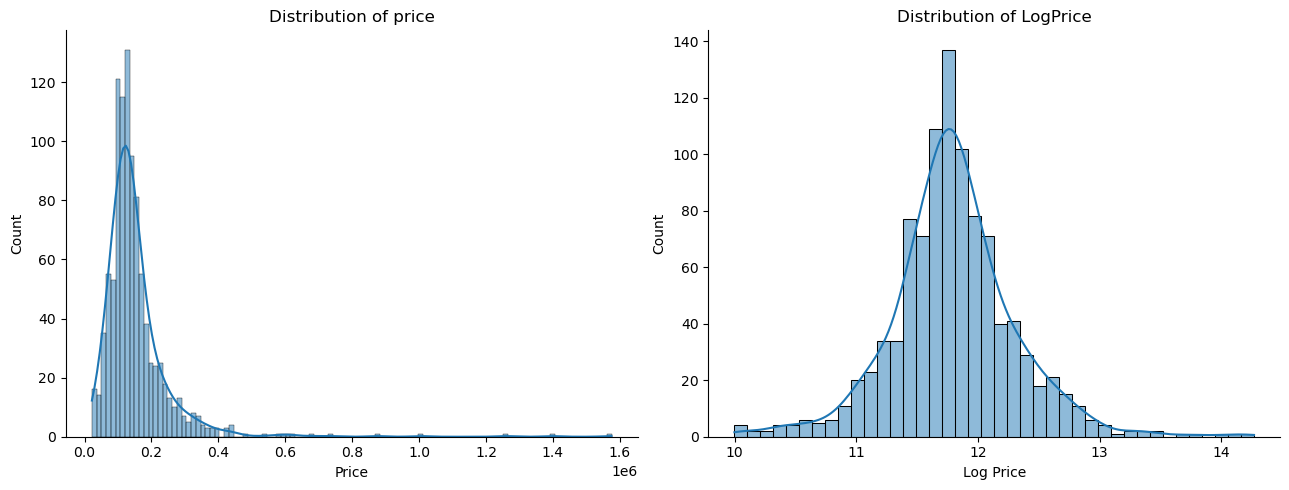

In [8]:
data['log_price'] = np.log(data['price'])

fig, ax = plt.subplots(1,2,figsize=(13,5))

# Plot histogram of price
sns.histplot(data=data, x='price', ax=ax[0], kde=True)
ax[0].set_title('Distribution of price', fontsize=12)
ax[0].set_xlabel('Price')

# Plot histogram of log price
sns.histplot(data=data, x='log_price', ax=ax[1], kde=True)
ax[1].set_title('Distribution of LogPrice', fontsize=12)
ax[1].set_xlabel('Log Price')

# Layout set up
sns.despine()
plt.tight_layout()
plt.show()

The data analysis indicates that the distribution of the 'price' variable is heavily skewed to the right and has a high peak, resulting in outlier values. Applying a log transformation results in a distribution that is roughly symmetric and has less extreme tails. This is beneficial as linear regression techniques like OLS and statistical inference methods for large samples work more effectively and accurately under conditions of symmetry and in the absence of outliers. Additionally, a skewed response variable can often imply varying error magnitudes and nonlinear relationships with potential predictors. Hence, using a log transformation is recommended in this scenario.


We are now having a clean dataset which is ready used to fit linear regression models

## Comment

We have the following data types for each column:
- Numerical variables: price, sqft, bedrooms, baths, age, fireplace, waterfront, dom
- Float variable: price
- Categorical variable: pool, occupancy ( owner, vacant, tenant )

In linear regression models, numerical values can be incorporated directly. The 'Price' variable, being a floating-point number, is suitable as the target. The 'Pool' variable is categorical and must be converted from 'yes' and 'no' to '0' and '1' to fit into the linear regression model. The 'Occupancy' data will be split into three separate columns for easier analysis.


#### (c) Investigate potential relationships between all predictors and house prices. Utilize charts, correlation coefficients, hypothesis testing, and other tools to support your analysis. Based on your findings, identify the most and the least influential predictors for explaining house prices and provide statistical evidence to support your conclusion.

#### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

## Charts

Divide all variables into 2 groups: Continuous variable and categorical variable

In [9]:
cont_var = ['sqft', 'Bedrooms', 'Baths', 'Age', 'DOM']
cate_var = ['Pool', 'Fireplace', 'Waterfront','Owner','Vacant','Tenant']

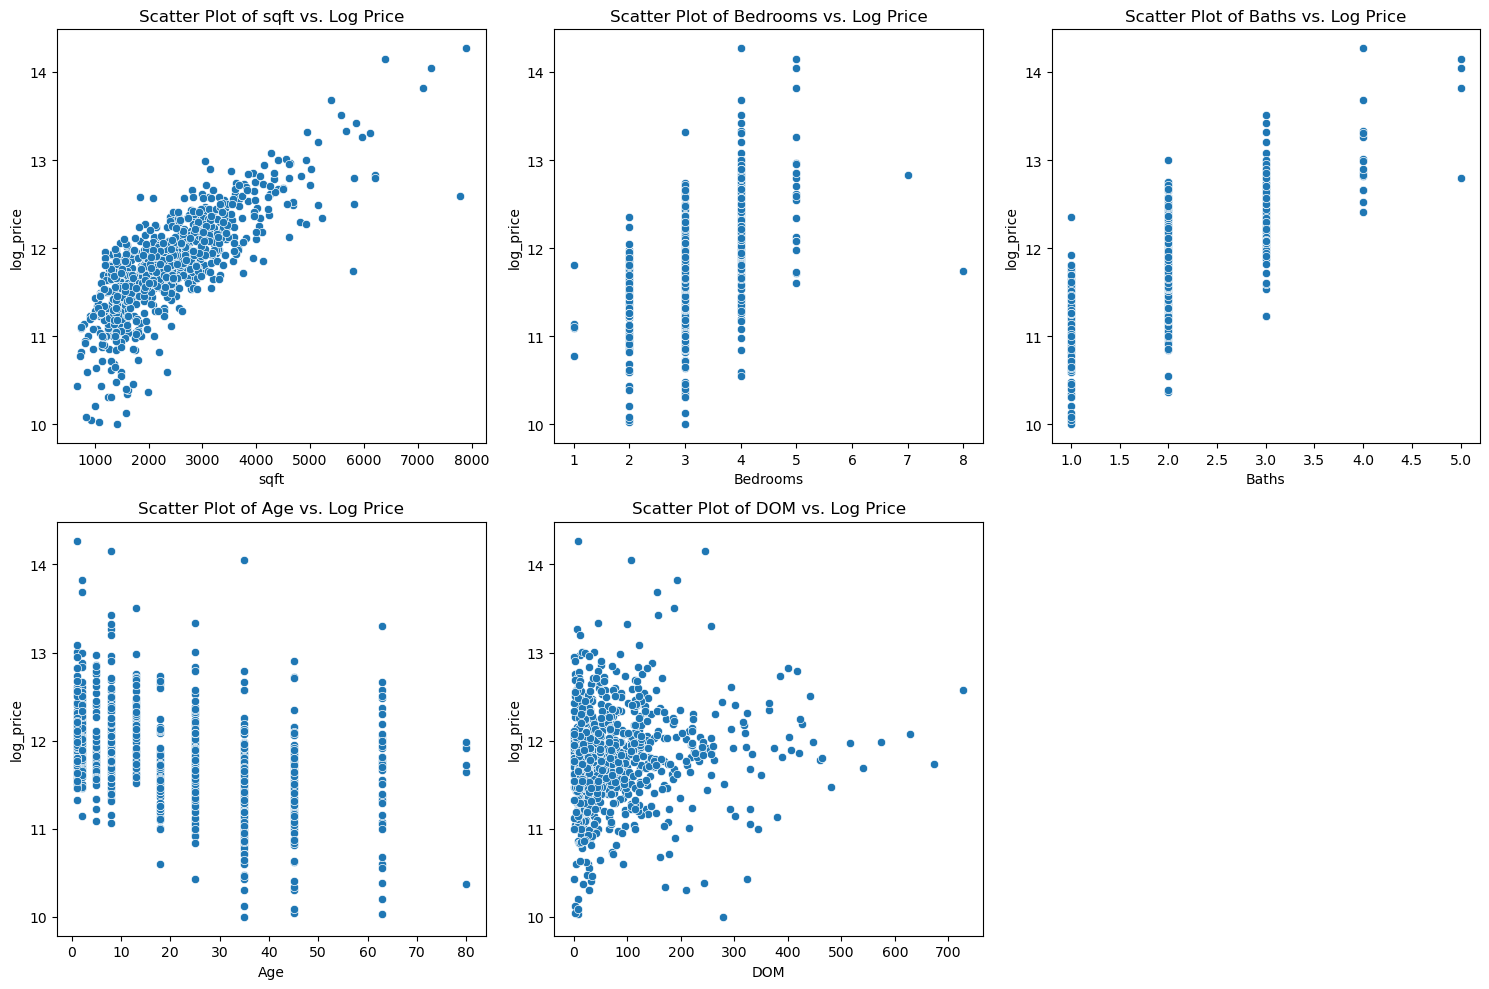

In [10]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(cont_var, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='log_price', data=data)
    plt.title(f'Scatter Plot of {var} vs. Log Price')
    
plt.tight_layout()
plt.show()

#### Scatter plot result

- sqft: Clear positive linear relationship with Log Price.
- Baths: Clear positive linear relationship with Log Price.
- Bedrooms: Clear positive linear relationship with Log Price, but not as strong as 'sqft' and 'Baths'
- Age: Unclear trend, might be a mild negative relationship with Log Price
- DOM (Days on Market): Unclear trend with Log Price.

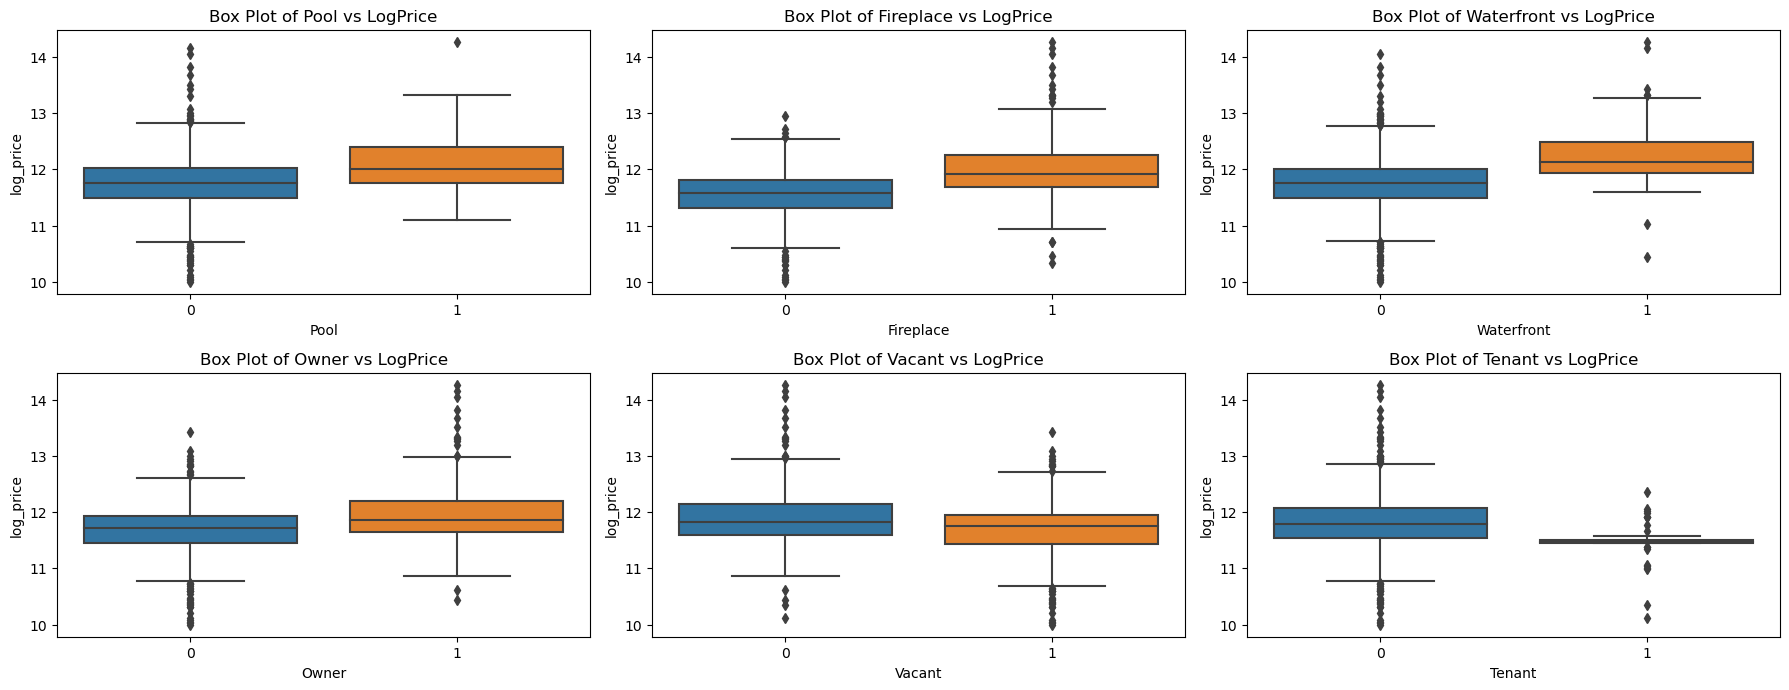

In [11]:
plt.figure(figsize=(18, 10))
for i, var in enumerate(cate_var, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=var, y='log_price', data=data)
    plt.title(f"Box Plot of {var} vs LogPrice")
plt.tight_layout()
plt.show()

#### Box plots result

- Pool: Houses with pools have a higher log_priceon average compared to those without.
- Fireplace: Houses with fireplaces seem to have a slightly higher log_price on average compared to those without.
- Waterfront: Houses with a waterfront have a higher log_price on average compared to those without a waterfront.
- Owner: Owner-occupied houses have higher log_price values on average than vacant and renter-occupied houses.


### Correlation coefficients

In [12]:
# Calcuate the correlation and round them with 2 decimals
variables=['log_price', 'sqft', 'Bedrooms', 'Baths','Age','Owner','Vacant','Tenant','Pool','Fireplace','Waterfront','DOM']
data[variables].corr().round(2)

,log_price,sqft,Bedrooms,Baths,Age,Owner,Vacant,Tenant,Pool,Fireplace,Waterfront,DOM
log_price,1.00,0.79,0.53,0.72,-0.37,0.28,-0.22,-0.14,0.19,0.44,0.25,0.11
sqft,0.79,1.00,0.67,0.71,-0.15,0.27,-0.17,-0.21,0.24,0.37,0.18,0.13
Bedrooms,0.53,0.67,1.00,0.56,-0.18,0.14,-0.04,-0.25,0.13,0.20,0.06,0.11
Baths,0.72,0.71,0.56,1.00,-0.30,0.22,-0.12,-0.24,0.20,0.37,0.19,0.10
Age,-0.37,-0.15,-0.18,-0.30,1.00,0.02,-0.05,0.06,0.01,-0.22,-0.16,-0.07
Owner,0.28,0.27,0.14,0.22,0.02,1.00,-0.90,-0.23,0.12,0.31,0.03,-0.12
Vacant,-0.22,-0.17,-0.04,-0.12,-0.05,-0.90,1.00,-0.21,-0.12,-0.24,-0.01,0.15
Tenant,-0.14,-0.21,-0.25,-0.24,0.06,-0.23,-0.21,1.00,0.00,-0.17,-0.05,-0.08
Pool,0.19,0.24,0.13,0.20,0.01,0.12,-0.12,0.00,1.00,0.10,0.08,-0.02
Fireplace,0.44,0.37,0.20,0.37,-0.22,0.31,-0.24,-0.17,0.10,1.00,0.12,0.07


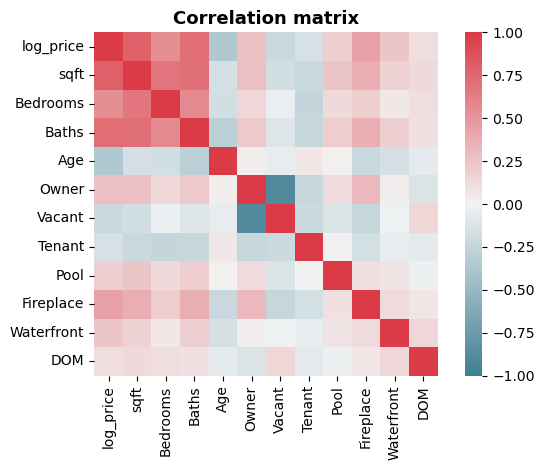

In [13]:
# Create correlation heat map
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

This Correlation coefficients identify relationships between all predictors and house prices clearer and stronger.

### Hypothesis Tesing

In [14]:
p_values = {}
for var in cont_var + cate_var:
    X = data[var]
    y = data['log_price']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values[var] = model.pvalues[var]

sorted_p_values = {k: v for k, v in sorted(p_values.items(), key=lambda item: item[1])}

sorted_p_values

{'sqft': 2.28969950819922e-213,
 'Baths': 1.3470598920955345e-160,
 'Bedrooms': 2.257960626436342e-74,
 'Fireplace': 5.518555220825344e-49,
 'Age': 4.5530370160366955e-33,
 'Owner': 1.7179912699101007e-19,
 'Waterfront': 3.839896780802011e-15,
 'Vacant': 3.2706400264049326e-12,
 'Pool': 6.339791217799302e-10,
 'Tenant': 4.484766398184336e-06,
 'DOM': 0.0004066025115183779}

Given alpha = 0.05, there is enough evidence to conclude that there is a significant relationship between the predictors and house prices.

The results show that: 

#### Most Influential Predictors:
- sqft: Strongest positive correlation (0.79)
- Baths: Strong positive correlation (0.72)
It is understable that the positive relation with the sqft due to the greater the area, the more comfortable and spacious for the house, which make the house price higher. The same logic applies for number of bathrooms.


#### Least Influential Predictor:
- DOM (Days on Market): Very weak positive correlation (0.11)
- Tenant: Weak negative correlation (-0.14) 
It is reasonable for DOM since it likely have no effect to the house prices. 

Hypothesis Tesing also confirm that all the categorical variables are significant, but the strongest influences are from 'sqft' and 'Baths'.

## Comments 

- Graphs allowed for visual trend recognition without precise quantification.
- Correlation heatmaps enhance the detection of relationships and their degrees of strength.
- The use of hypothesis testing reveals the significance levels of the predictors.
- Additionally, statistical tests confirm the significance of all categorical variables, with square footage and the number of bathrooms exerting the most substantial influence. In contrast, variables such as Tenant (Occupancy) and days on market (DOM) exhibit the lowest p-values.

## Task 2 (15 marks)

- Conduct (with $\alpha=0.05$) the appropriate t-test, median and Mann-Whitney U tests, to assess whether houses prices are typically higher for houses with water front (the alternative of unequal prices is fine for the median test). 
- Assess all assumptions made. 
- Which test’s result do you believe the most? Discuss and explain.

Provide relevant analysis to support your answers.


#### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

### Student t-test

In [15]:
from scipy import stats 
stats.ttest_ind(data.loc[data['Waterfront'] == 1, 'log_price'],data.loc[data['Waterfront'] == 0, 'log_price'], equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=6.732719908130881, pvalue=1.3033025793601067e-09)

The hypotheses are:

- $H_0:$ the two group means are equal: $\mu_{\text{with}} = \mu_{\text{without}}$.

- $H_1:$ the mean of first group (prices of houses with a waterfront) is higher: $\mu_{\text{with}} > \mu_{\text{without}}$.

We choose $\alpha=0.05$ as standard. The test stat is $t = 6.7327$ if the null of equality of means is, and the assumptions are also, true. The chance that the resulting Student-t value would be as high or higher than $6.7327$ in absolute value is very close to 0, since the p-value here is $1.3033025793601067e-09$ $< 0.05$. So we reject the null hypothesis and conclude that the mean of first group (prices of houses with a waterfront) is higher. In other words, there is a significant relationship between having a waterfront and price of a house.

Considering three assumptions of the two-sample t-test:
1. The data are iid in each group: This assumption relies on whether the price of one house influences other's. Despite not having evidence about this, we assume that it's true.
2. Groups are independent of each other: This assumption is that prices of houses with a waterfront do not influence prices of those without a waterfront, or vice versa. Similarly, we also assume this is true although we don't really know for sure.
3. Each group is normally distributed OR $E(Y_i^4) < \infty$ in each group: This assumption is always satisfied when house price is bounded to a finite region. It is obviously that it lowerbounded by $0$. Also, as there are finite number of houses and each buyer has finite amounts of money, it can be inferred that house price is implicitly bounded. Hence, the 4th moment of house price is finite, which indicates that this assumption is true.

In summary, as price of one house does not significantly influences other's, then the above t-test for difference in mean prices is valid and the conclusion can be trusted.

### Median test

In [16]:
from scipy.stats import median_test
median_test(data.loc[data['Waterfront']==1, 'log_price'], data.loc[data['Waterfront']==0, 'log_price'], ties="ignore")

(41.03325295283149,
 1.4966108198704903e-10,
 11.77528972943772,
 array([[ 62, 432],
        [  9, 485]]))

The hypotheses are: 

- $H_0: \mbox{median}_{with} = \mbox{median}_{without}$ 
- $H_1: \mbox{median}_{with} \neq \mbox{median}_{without}$.

Choose $\alpha = 0.05$ as standard. The test statistic is $41.03$, which under the null follows a $\chi^2_1$ distribution. In this case, the p-value is $1.4966108198704903e-10$, which is $< 0.05$, thus we can reject the null hypothesis. We conclude that there is significant difference in median between $Y$ for groups of houses with and without a waterfront. 

Four assumptions are made here: 
1. The two groups are independent of each other: It is assumed that the first assumption of median test is true to do the testing.
2. The data are iid in each group: It is also assumed that the price of one house does not influence other's.
3. The data are at least on the ordinal scale: This assumption is obviously satisfied as house price is a numerical variable hence it is ordinal.
4. The assumptions of Pearson's OR Fisher's test hold: As can be seen from the contigency table at the test's result, all the expected values we get are higher than $5$. So this final assumptions is satisfied.

In short, as long as price of one house does not significantly influences other's, the result of the above median test can be concluded to be valid.

### Mann-Whitney U test

In [17]:
from scipy.stats import mannwhitneyu
mannwhitneyu(data.loc[data['Waterfront']==1, 'log_price'], data.loc[data['Waterfront']==0, 'log_price'], alternative='two-sided')

MannwhitneyuResult(statistic=50574.5, pvalue=3.732551828581016e-14)

- Group 1: Houses with waterfronts
- Group 2: Houses without waterfront

The hypotheses are: 

- $H_0:$ Y in group 1 has the same distribution as $Y$ in group 2: $P(Y_1 > Y_2) = 0.5$

- $H_1:$ Y in group 1 does not have the same distribution as $Y$ in group 2: $P(Y_1 > Y_2) \neq 0.5$.
                    
Choose $\alpha = 0.05$ as standard.The test statistic assesses whether there is a difference in the sum of the ranks in each group. Here it is $U = 50574.5$, which under the null follows a large sample normal distribution with mean and variance as given by the test. In this case, the p-value is $ 3.732551828581016e-14$, which is the two-sided p-value from a standard normal distribution, where $Z$ is the standardised value of $U$. As this is $< 0.05$, we reject the null hypothesis. Hence, we conclude that there is a significant difference in the distribution of $Y$ between the two groups.

For the test to be conducted, three assumptions are made: 
1. The two groups are independent of each other.
2. The data are iid in each group.
3. The data are at least on the ordinal scale.
4. Each group's sample size is large enough for the CLT to work.

Similarly arguing as above, the third assumption is satisfied and the first two assumptions maybe satisfied without really having evidence. Regarding the final assumption, since $n_i \geq 8$ is regarded as sufficient, the sample sizes are more than enough here. Therefore, the result Mann-Whitney conducted above can be considered to be valid.

## Comment

With the results above, all the three aforementioned result generate the same result: rejecting the null hypothesis and concluding that there is a significant difference in the prices of houses with and without a waterfront. However, despite having all assumptions satisfied, those tests have different level of power. 

We already knew that Mann-Whitney test is better than the median test. However, it is just better than the Student t-test when the assumptions of t-test are not satisfied. In this case, as the data set in has a few outliers, Mann Whitney test is the best fit.

## Task 3 (15 marks)

- Conduct a simple linear regression analysis, first using OLS and then using LAD estimation, for houses’ prices on living area size in square meters. 
- Report and comment on parameter estimates & significant test for slope, model fitting. 
- Fully assess all assumptions made for both OLS and LAD. 
- Comment on the similarities and differences of estimation results obtained from OLS and LAD. You can use the theoretical discussions on OLS and LAD to confirm what you observed.

Provide relevant analysis to support your answers.

#### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

### OLS estimation 

In [18]:
reg_ols_15 = smf.ols(formula='log_price ~ sqft', data=data).fit()
print(reg_ols_15.summary()) 

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1649.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.29e-213
Time:                        23:18:02   Log-Likelihood:                -262.03
No. Observations:                 997   AIC:                             528.1
Df Residuals:                     995   BIC:                             537.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8423      0.026    424.693      0.0

OLS estimator assumes:
1. Linearity: $Y = \beta_0 + \beta_1 X + \varepsilon$ is the true population linear model.
2. Exogeneity: $ E(\varepsilon|X) $ $=0$
3. Independence: The data pairs $Y_i, X_i$ are i.i.d.
4. 4th moment exists: $E(Y^4), E(X^4)$ are finite $< \infty$
5. Constant error variance: $Var(\varepsilon|X) = \sigma^2$


The 'Predictor vs residuals' graph shows no clear patterns, so we can assume LSA 1 is met.

For LSA 2, it suggests that the mean residual error should be 0. But the scatter plot mostly lies above 0, and the smoothed regression curve doesn't align with the horizontal line x=0 for many X values. This means the average residual error isn't 0, violating LSA 2.

LSA 3 talks about data being independently and identically distributed (iid). Since there's no evidence to suggest this data is non-random, time series, or spatial, we'll assume LSA 3 is valid.

LSA 4 discusses the existence of the 4th moment. This is met if both house price and living area are limited. Both variables are clearly at least 0. Given there's a set number of houses and buyers have limited funds, the house price is effectively capped. Similarly, due to limited land, living area size is also capped. So, LSA 4 is likely met.

Lastly, LSA 5 concerns consistent error variance. The residual graph indicates varying error across different X values. So, the assumption of consistent error variance isn't satisfied.

### LAD estimation 

In [19]:
mod = smf.quantreg(formula='log_price ~ sqft', data=data)
reg_LAD = mod.fit(q=.5)
print(reg_LAD.summary())

                         QuantReg Regression Results                          
Dep. Variable:              log_price   Pseudo R-squared:               0.3889
Model:                       QuantReg   Bandwidth:                      0.1140
Method:                 Least Squares   Sparsity:                       0.5893
Date:                Wed, 13 Sep 2023   No. Observations:                  997
Time:                        23:18:02   Df Residuals:                      995
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8754      0.024    455.442      0.000      10.829      10.922
sqft           0.0004   9.47e-06     43.092      0.000       0.000       0.000

The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


The LAD estimator assumes:

1. Linearity: $Y = \beta_0 + \beta_1 X + \varepsilon$ is the true population linear model.
2. The median of $(\varepsilon | X)$ $=0$
3. Independence: The data pairs $Y_i, X_i$ are i.i.d.
4. Continuity of density: $p(Y_i|X_i)$  is a continuous function.
5. 1st absolute moment of Y exists: $E(|Y|)$ exists, i.e. is finite $< \infty$.
6. 2nd moment of X exists: $E(X^2)$ exists, i.e. is finite $< \infty$.

The 'Predictor vs LAD residuals' chart is nearly the same as the OLS residuals chart. Therefore, LSA 1 and LSA 3 are likely met, but LSA 2 is not.

For Assumption 4, it implies that the probability $p(Y_i|X_i)$ should be continuous. Even though we don't have specifics on $p(Y|X)$ we'll assume it's continuous. This continuity is essential for calculating the standard errors of LAD estimates based on $p(Y|X)$.
Assumptions 5 and 6 are more lenient compared to the requirements for OLS estimation. Since the OLS requirements were met earlier, these relaxed requirements should also be met. Moreover, we no longer need rare outliers because even if the 4th moments, $E(Y^2)$ and $Var(Y)$ are infinite, it's not a concern. Only extremely high numbers or levels of outliers would be concerning for these two assumptions, and there's no evidence of that. So, both Assumption 5 and 6 are likely satisfied.

In conclusion, the LAD assumptions are more probable to be met compared to the OLS LSA.

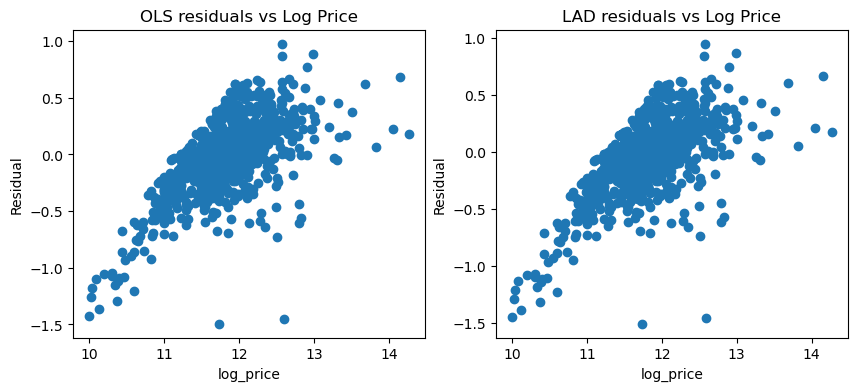

In [20]:
# Residuals using OLS and LAD
resid_OLS = reg_ols_15.resid
resid_LAD = reg_LAD.resid

# Fitted values using OLS and LAD
fit_OLS = reg_ols_15.fittedvalues
fit_LAD = reg_LAD.fittedvalues

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.scatter(data['log_price'], resid_OLS)
ax1.set_title('OLS residuals vs Log Price')
ax1.set_xlabel('log_price')
ax1.set_ylabel('Residual')
ax2.scatter(data['log_price'], resid_LAD)
ax2.set_title('LAD residuals vs Log Price')
ax2.set_xlabel('log_price')
ax2.set_ylabel('Residual')
plt.show()

#### OLS Residuals and LAD Residuals vs. Fitted Value:
- OLS Residuals vs. Fitted Value:
The residual graph shows a cone-like shape, indicating heteroscedasticity. This suggests that the consistency of residual variance across the range of fitted values is lacking. Such a pattern can be a sign of non-linearity between variables. As log price increases, there's a slight expansion in the spread of residuals.

- LAD Residuals vs. Fitted Value:
In comparison to the OLS plot, the residuals appear less clustered around the zero mark. Given the presence of outliers, the LAD regression might be more robust. The evenness in the spread of residuals across fitted values hints at homoscedasticity.

Based on the residual diagrams, LAD regression appears to provide a steadier fit for log_price values than OLS regression. Its resilience to outliers might be a factor in its superior performance. Further testing is required to determine the most suitable model for this data set.

In [21]:
print(reg_ols_15.params)

Intercept    10.842281
sqft          0.000411
dtype: float64


## Comment 

#### OLS Regression Results:

1. Parameter Estimates:
    - Intercept: 10.842281
    - Slope: 0.000411
  
2. Significance Test for Slope
    - T-Statistic = 40.606
    - P-Value < 0.05
  
The slope is statistically significant, implying that the living area size in square meters does influence the house price.

3. **Model Fitting**:
    - R-squared =  0.624
  
The model explains approximately 62.4% of the variance in the house prices.
    
####  LAD Regression Results:

1. Parameter Estimates:
    - Intercept: 10.876998
    - Slope: 0.000408
  
#### Comparison:

##### Parameter Estimates:

- OLS gives a a different intercept and bigger slope estimate (0.000411) compared to LAD (0.000408).

##### Robustness:

- LAD is more robust to outliers and does not assume normality or constant variance of the errors.

##### Model Fit:
- OLS provides an R_squared value (0.624) to assess model fit, whereas LAD does not provide such a measure.

##### Interpretation:
- Both methods suggest that as the living area size increases, so does the house price, though the extent of this relationship differs.

##### Theoretical Discussions:
- OLS focuses on reducing the squared differences between the observed and predicted values and can be influenced by outliers. It typically assumes data normality for inferential tests.
- On the other hand, LAD works by minimizing the absolute differences and is more resilient to outliers. It doesn't rely on data having a normal distribution.
- Considering the significant variance and possible outliers in the house prices, LAD, with its robustness, appears to be a more fitting choice for analyzing this dataset.

## Task 4 (10 marks)
- Given the SLR model in Task 3, now we want to add one more predictor to improve the model fit using a MLR. Based on the analysis in Task 1, what is the second predictor you will use together with living area size to improve the model fit of the SLR? 
- Fit the MLR model using OLS estimator. Report and comment on parameter estimates & significant test for slopes and model fitting. Is the model fit improved compared to the SLR model in Task 3? 

Provide relevant analysis to support your answers.

#### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

From the findings in Task 1, the 'Baths' variable showed a notable correlation with 'price' (0.67) and had a significantly low p-value in the statistical tests. This makes it a compelling choice to enhance the model when combined with the current predictor, 'sqft'.

I will implement the Multiple Linear Regression (MLR) model using these predictors ('sqft' and 'Baths') employing the Ordinary Least Squares (OLS) method. We'll then juxtapose this model's performance with the Single Linear Regression (SLR) model from Task 3.

In [22]:
mlr_1 = smf.ols(formula='log_price ~ sqft + Baths', 
               data=data).fit() 
print(mlr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1035.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.04e-243
Time:                        23:18:02   Log-Likelihood:                -188.02
No. Observations:                 997   AIC:                             382.0
Df Residuals:                     994   BIC:                             396.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5746      0.032    332.298      0.0

#### Comment # Rephrase


#### Estimated Model

$$
\widehat{\log(\text{Price})}={10.5746}+{0.0003}\times\text{Sqft}+{0.2755}\times\text{Baths},\qquad \text
{R}^2=0.676
$$

- The regression formula suggests that when comparing two properties from the set, if one has an additional year of sqft, it's predicted to have a price that's 0.03% higher. This indicates that a larger living area is practically linked to an increased property price.
- Additionally, we estimate that a home with an extra bathroom is likely to be priced 27.5% higher than a similar home, considering the same timeframe.

#### MLR Results:

1. Parameter Estimates:
    - Intercept: 10.5746
    - Slope for sqft: 0.0003
    - Slope for baths:  0.2755
  
2. Significance Test for Slope:
    - T-Statistic for sqft = 21.860 (P-value < 0.05)
    - T-Statistic for baths = 12.614 (P-value < 0.05)
  
Both slopes are statistically significant, implying that 'sqft' and 'Baths' both strongly influence house prices.

3. Model Fitting:
    - R-squared = 0.676
    - Adjusted R-squared = 0.675
    The model explains approximately 67.6% of the variance in the house prices.
    
4. Comparison with SLR Model:
The R-squared value for the MLR model (0.676) is higher than the R-squared value for the SLR model (0.624). This indicates that the model fit has improved by adding the second predictor (Baths).

5. Conclusion:
The Multiple Linear Regression model using 'sqft' and 'Baths' as inputs offers a better fit than the Single Linear Regression model, which is supported by the elevated R-squared score. The significance of both variables is statistically confirmed, underscoring their impact on property values.


## Task 5 (10 marks)

- Repeat all steps in Task 4 with one additional predictor. What is the third predictor you will select? 
- Fit the MLR model using OLS estimator. Report and comment on parameter estimates & significant test for slopes and model fitting.
- Is the model fit improved compared to the SLR model in Task 4?
- Discuss potential co-linearity issue between predictors in this model.

 Provide relevant analysis to support your answer.
 
 #### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

In [28]:
features = data[['sqft', 'Baths', 'Bedrooms','Age']]
features_with_const = sm.add_constant(features)

vif_df = pd.DataFrame()
vif_df["Variables"] = features_with_const.columns[1:]
vif_df["VIF"] = [variance_inflation_factor(features_with_const.values, i + 1) for i in range(len(features_with_const.columns) - 1)]

vif_df

,Variables,VIF
0,sqft,2.615576
1,Baths,2.222103
2,Bedrooms,1.887734
3,Age,1.111668


In Task 1, we observed that the number of Bedrooms significantly correlates with home values, with a correlation coefficient of 0.53. However, based on VIF assessments, there's evidence of multicollinearity. As a result, I opted for a predictor that has a negative relationship with log_price, which is 'Age', with a coefficient of -0.37. While its correlation isn't as pronounced as sqft and Baths, it remains an impactful variable and it has a lower VIF. So I will choose 'Age' as the third predictor.

In [29]:
mlr_2 = smf.ols(formula='log_price ~ sqft + Baths + Age', 
               data=data).fit() 
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     823.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.02e-269
Time:                        23:23:20   Log-Likelihood:                -126.44
No. Observations:                 997   AIC:                             260.9
Df Residuals:                     993   BIC:                             280.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7962      0.036    302.730      0.0

## Comment 

#### MLR Results:

#### Estimated Model

$$
\widehat{\log(\text{Price})}={10.7962}+{0.0003}\times\text{Sqft}+{0.2084}\times\text{Baths}-{0.0061}\times\text{Age},\qquad \text{R}^2=0.713
$$

- The regression analysis indicates that for two properties selected at random, if one has an additional square foot of living space, its price is projected to be 0.03% higher. This shows that there's a significant correlation between the size of the living area and a higher property price.
- Our analysis also suggests that properties with an extra bathroom are priced, on average, 20.8% higher than those without, assuming all other factors remain constant.
- Additionally, our data reveals that for every additional year in a property's age, its value tends to decrease by 0.6%. The R-squared value of this regression model is 0.713, indicating a slightly better fit than our initial multiple linear regression model.

1. Parameter Estimates:
    - Intercept: 10.796155
    - Slope for sqm: 0.000305
    - Slope for baths: 0.208390
    - Slope for bedrooms: -0.006075
  
2. Significance Test for Slope
    - T-Statistic for sqm = 24.170 (P-value < 0.05)
    - T-Statistic for baths = 9.755 (P-value < 0.05)
    - T-Statistic for bedrooms = -11.426 (P-value < 0.05)
  
Both slopes are statistically significant, implying that sqft and Baths both influence house price.

3. Model Fitting:
    - R-squared = 0.713
    - Adjusted R-squared = 0.712
The model explains approximately 71.3% of the variance in the house prices.
    
4. Comparison with SLR Model:
The R-squared value for the MLR model (0.713) is higher than the R-squared value for the previous MLR model (0.712). This indicates that the model fit has improved by adding the second predictor (Baths).

5. Variance Inflation Factor (VIF) Results:

A VIF value greater than 5-10 indicates high collinearity. In this case, all VIF values are well below that threshold, suggesting that multicollinearity is not a concern in this model.

6. Conclusions
- The addition of the Age predictor improved the model fit marginally
- There is no evidence of problematic multicollinearity among the predictors based on VIF values.

## Task 6 (10 marks)

- Use three linear regression models you have developed so far to make price predictions for the 80 houses shown in the test data $D_{test}$, and compute the prediction errors measured in RMSE. Use OLS estimates for all models. 
- Among three models you have developed, which model has lowest prediction error? Is it what you expected? Why or why not?

 Provide relevant analysis to support your answer.
  
 #### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

In [30]:
test_data = pd.read_csv('house_price_data_test.csv')
test_data.dropna(subset=['price'], inplace=True)
test_data['Pool'] = test_data['Pool'].replace({'No': 0, 'Yes': 1})
test_data['log_price']=np.log(test_data['price'])
test_data.head()

,price,sqft,Bedrooms,Baths,Age,Occupancy,Pool,Fireplace,Waterfront,DOM,log_price
0,112500,1836,3,2,25,1,0,0,0,45,11.630709
1,99900,1495,3,2,25,1,0,0,0,10,11.511925
2,149000,2876,3,2,45,1,0,1,0,2,11.911702
3,215000,1947,3,2,1,2,0,1,0,667,12.278393
4,206900,2694,3,2,2,1,0,1,0,115,12.239991


In [31]:
reg_ols_15_test = smf.ols(formula='log_price ~ sqft', data=test_data).fit()

In [32]:
from sklearn.metrics import mean_squared_error
test_data['pred_price_slr'] = reg_ols_15.predict(test_data)
test_data['pred_price_mlr_1'] = mlr_1.predict(test_data)
test_data['pred_price_mlr_2'] = mlr_2.predict(test_data)

rmse_reg_ols_15 = np.sqrt(mean_squared_error(test_data['log_price'], test_data['pred_price_slr']))
print(f"OLS fitted RMSE:{round(reg_ols_15_test.mse_resid**0.5,4)}") 
rmse_mlr_1 = np.sqrt(mean_squared_error(test_data['log_price'], test_data['pred_price_mlr_1']))
rmse_mlr_2 = np.sqrt(mean_squared_error(test_data['log_price'], test_data['pred_price_mlr_2']))

rmse_reg_ols_15, rmse_mlr_1, rmse_mlr_2

OLS fitted RMSE:0.3989


(0.39708950550111, 0.37524589003520015, 0.33616800207417163)

## Comment

#### RMSE Results

- Simple Linear Regression RMSE = 0.39708950550111
- Multiple Linear Regression 1 RMSE = 0.37524589003520015
- Multiple Linear Regression 2 RMSE = 0.33616800207417163

The Multiple Linear Regression 2 model has the lowest prediction error among the three models, with an RMSE of 0.33616800207417163

#### Analysis:

This is what I expect as we move from a simple linear regression to multiple linear regression, I expect the prediction error to decrease, provided the additional variables in the multiple regression models contribute significant information in predicting the dependent variable. This is because multiple linear regression models consider more factors, allowing for a more nuanced representation of the relationships within the data.

In conclusion, it is somewhat expected for Multiple Linear Regression models to have a better (lower) RMSE than a Simple Linear Regression, especially if the added predictors in the multiple regression models are relevant. The results here align with this expectation, with Multiple Linear Regression 2 outperforming the other two models.

## Task 7 (10 marks) 

- Write a brief report summarizing and discussing your findings and conclusions. For example, are the predictors useful to explain the house prices? What are about the performance of linear models used? Are the LSAs satisfied? If not, what should we do? etc.
- If you are a property investor, what are your strategies when buying houses to maximize the capital gain based on what you have discovered so far?

 #### Answer:

You can make multiple code cells (with intermediate comments) but only make final discussion in the `Comment` cell

# Summary Report on House Price Analysis 

#### Introduction:
The analysis aimed to understand the relationship between various features of houses and their prices. A series of linear regression models were developed for this purpose, starting from Simple Linear Regression (SLR) to Multiple Linear Regression (MLR) models with different sets of predictors.

##### Overview of the Analysis:
We constructed three linear models to estimate house prices using different variables: 'sqft', 'Baths', and 'Age' and analyzed a basic linear model focusing solely on sqft, followed by two multiple linear regression models: the first incorporated 'sqft' and 'Baths', and the second added 'Age' to the first.

##### Importance of Variables:
- 'Sqft' consistently emerged as a pivotal determinant of house prices across all models.
- The addition of 'Baths' and 'Age' provided a more comprehensive understanding, enhancing our capability to explain variations in house prices.

##### Performance of Linear Models:

- The simplest model had the highest RMSE, indicating lower performance in terms of relative errors.
- The model incorporating 'sqft', 'Baths' and 'Age' (MLR 2) delivered the best performance, highlighting the importance of considering multiple factors when analyzing relative changes in house prices.

##### Examination of Linear Statistical Assumptions (LSAs):

- The residual plots indicated potential issues, especially heteroscedasticity, which violates one of the fundamental assumptions of linear regression.
- While the Log Price transformation can mitigate some non-linearity and heteroscedasticity, the observed patterns in the residuals suggest that challenges remain.

##### Recommended Actions:

- To address the violation of the homoscedasticity assumption, further transformations or techniques like weighted least squares might be considered.
- Exploring other potential predictors, interaction terms, or even non-linear models could enhance predictive accuracy and adherence to model assumptions.

##### Strategies for Property Investors:

- Prioritize Square Footage: The analysis consistently emphasized the significance of sqft. Properties with larger square footage in areas with higher price per square foot can offer substantial capital gains.
- Consider Age and Features: The age of a property and features like the number of bathrooms can influence its price. While newer homes may command higher prices, older properties might offer opportunities for renovation and value addition.
- Diversify Investments: Given the nuances and potential non-linearities in property prices, diversifying investments across different types of properties and locations can hedge risks.
- Stay Data-Informed: Regularly revisiting and updating predictive models with new data can provide dynamic insights into the evolving real estate market, helping investors make informed decisions.

#### Conclusion:

Through the analysis, there are many important information about factors affecting house prices. It is recommended to combine the results of data analysis, expert opinions, and market trends to have better decision making that related to house prices.
